Starting SARIMAX Model for Sensor 0
Starting SARIMAX Model for Sensor 1
Starting SARIMAX Model for Sensor 2
Starting SARIMAX Model for Sensor 3
Starting SARIMAX Model for Sensor 4
Starting SARIMAX Model for Sensor 5
Starting SARIMAX Model for Sensor 6
Starting SARIMAX Model for Sensor 7
Starting SARIMAX Model for Sensor 8
Starting SARIMAX Model for Sensor 9
Starting SARIMAX Model for Sensor 10
Starting SARIMAX Model for Sensor 11
Starting SARIMAX Model for Sensor 12
Starting SARIMAX Model for Sensor 13
Starting SARIMAX Model for Sensor 14
Starting SARIMAX Model for Sensor 15
Starting SARIMAX Model for Sensor 16
Starting SARIMAX Model for Sensor 17
Starting SARIMAX Model for Sensor 18
Starting SARIMAX Model for Sensor 19
Starting SARIMAX Model for Sensor 20


C:\Users\punee\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Starting SARIMAX Model for Sensor 21
Starting SARIMAX Model for Sensor 22
Starting SARIMAX Model for Sensor 23
Starting SARIMAX Model for Sensor 24
Starting SARIMAX Model for Sensor 25
Starting SARIMAX Model for Sensor 26
Starting SARIMAX Model for Sensor 27
Starting SARIMAX Model for Sensor 28
Starting SARIMAX Model for Sensor 29
Starting SARIMAX Model for Sensor 30
Starting SARIMAX Model for Sensor 31
Starting SARIMAX Model for Sensor 32
Starting SARIMAX Model for Sensor 33
Starting SARIMAX Model for Sensor 34
Starting SARIMAX Model for Sensor 35


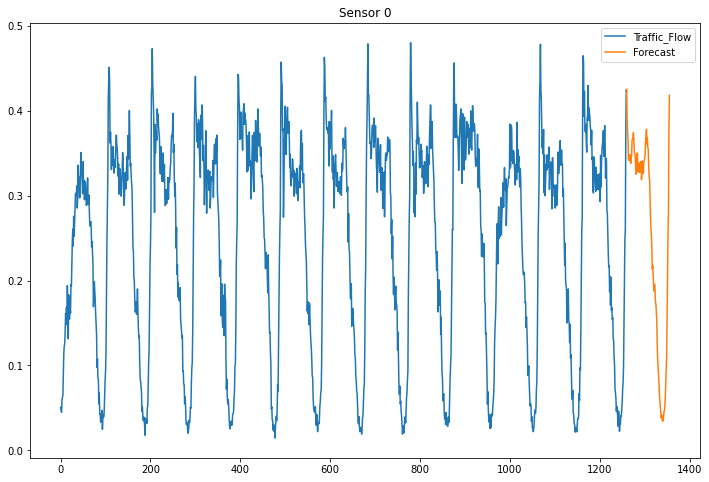

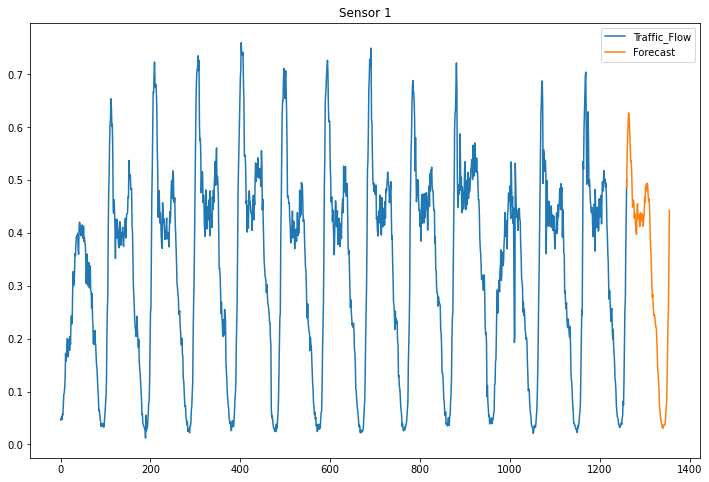

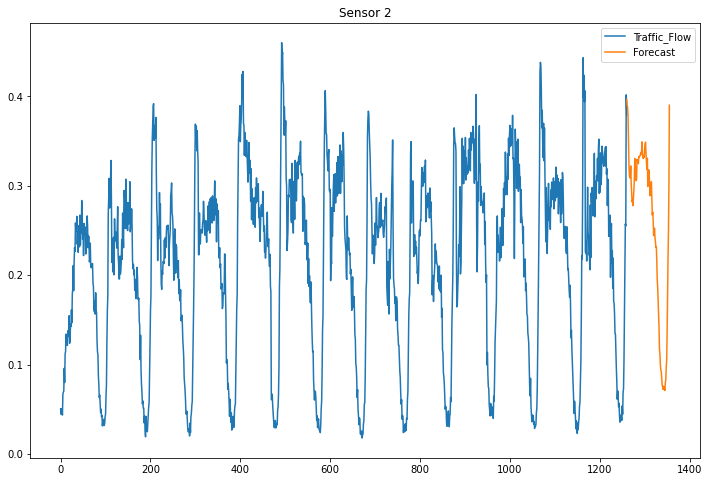

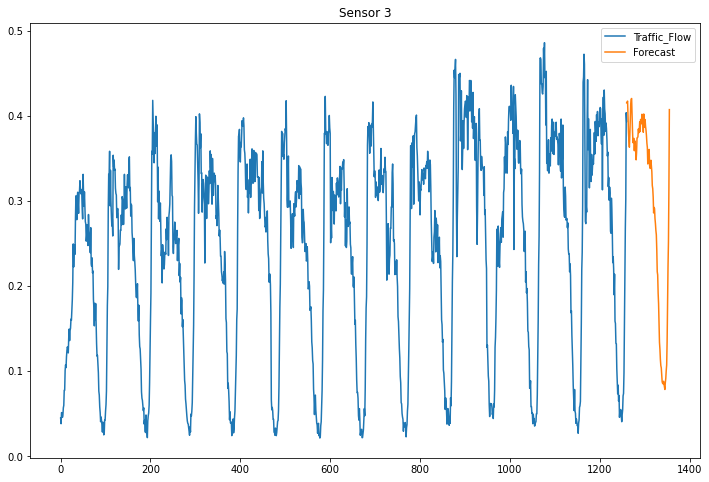

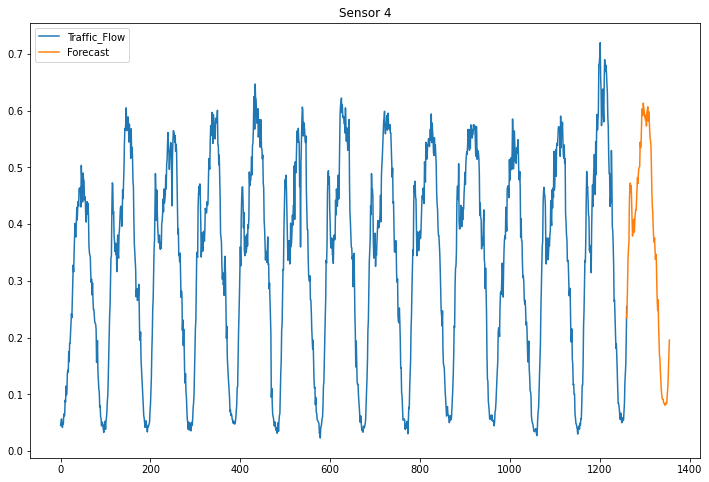

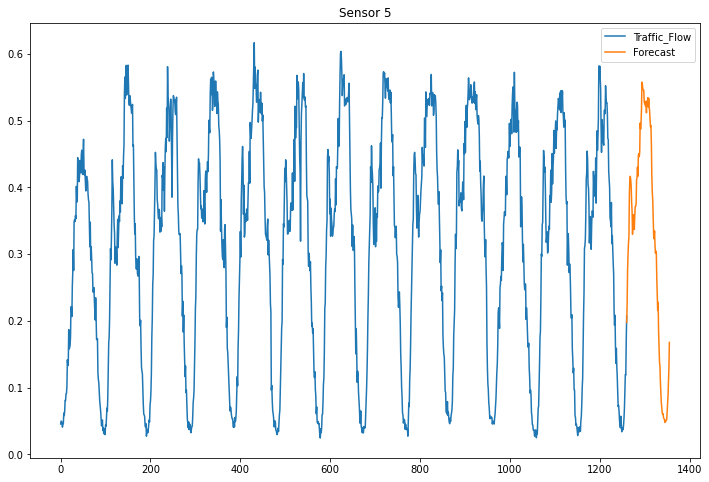

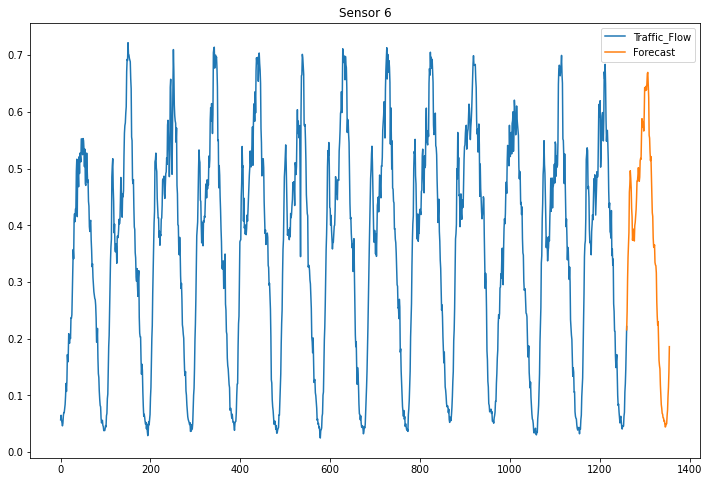

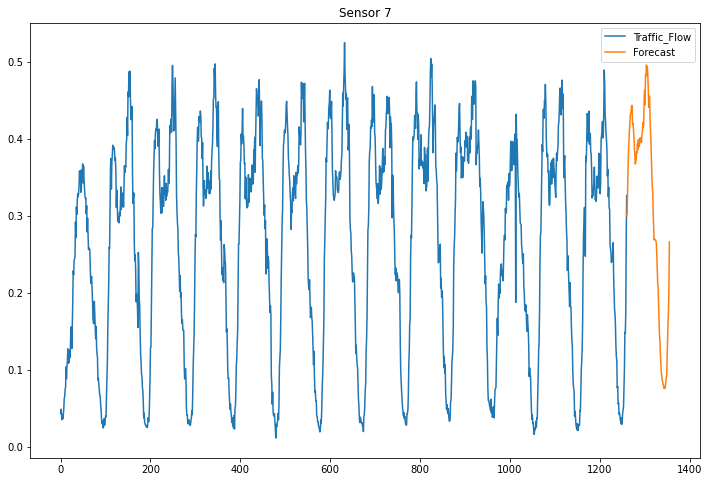

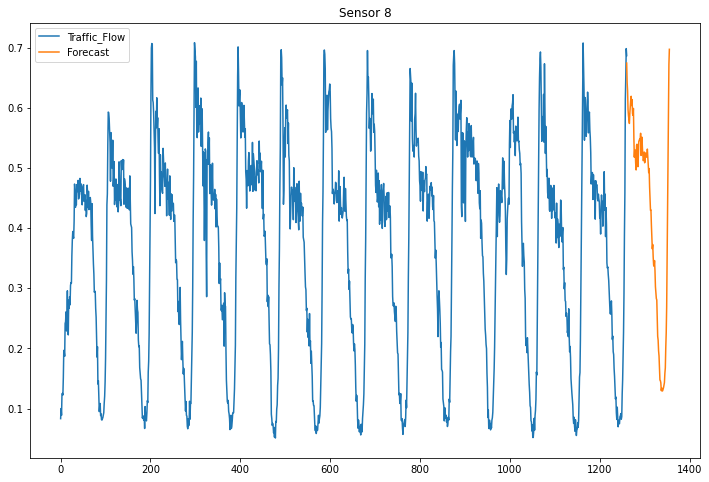

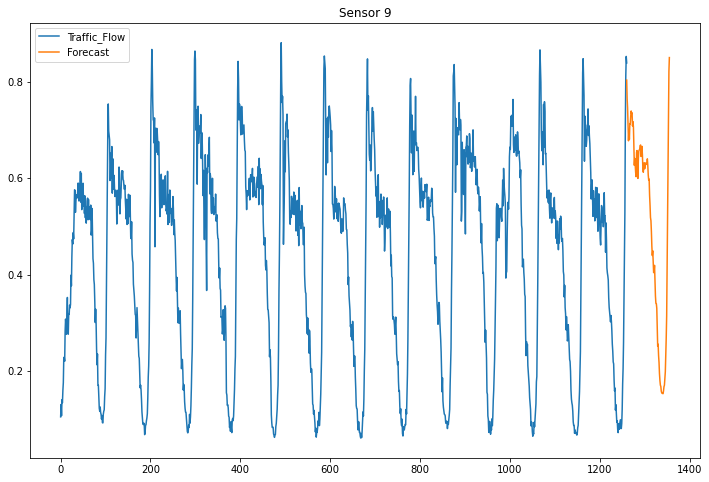

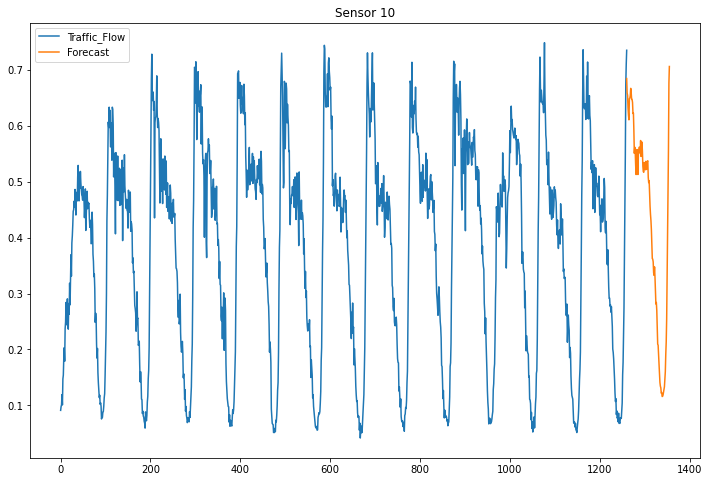

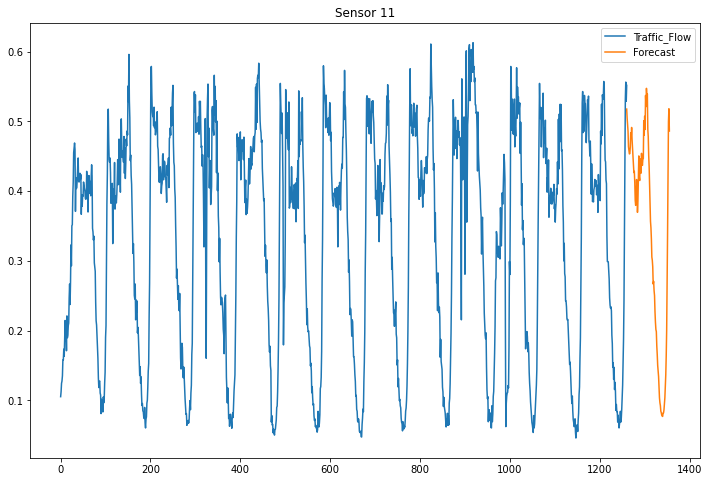

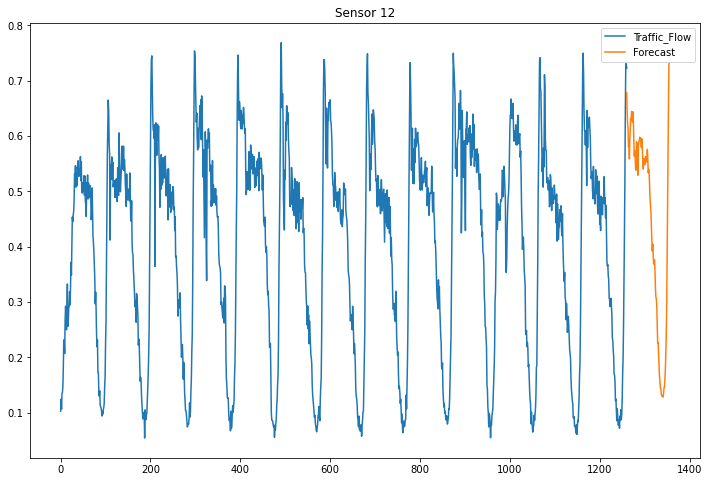

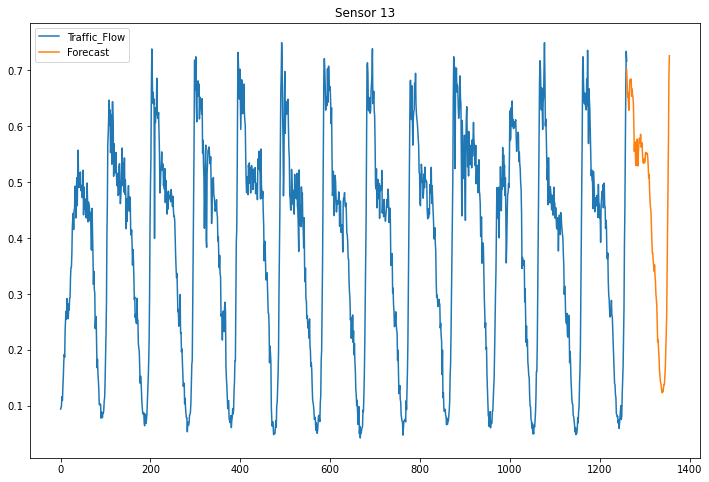

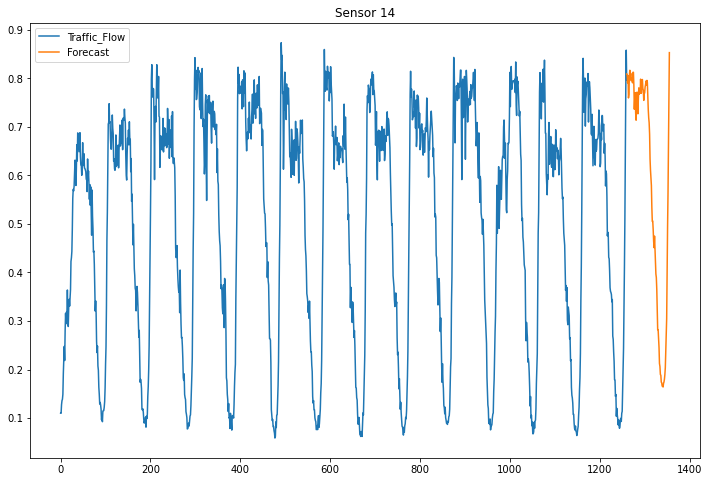

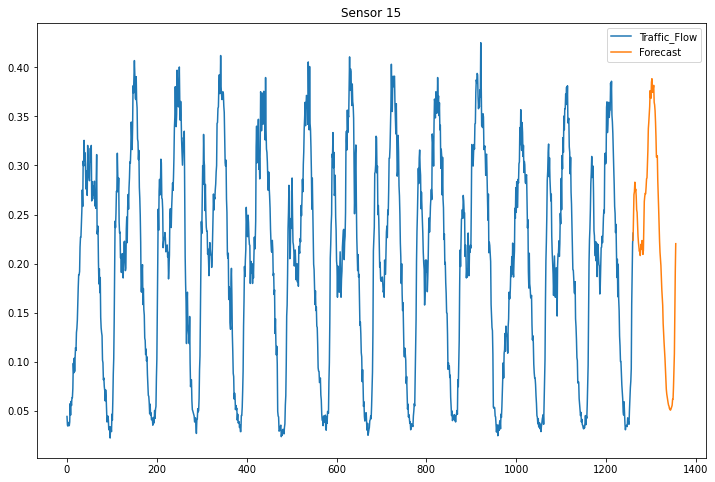

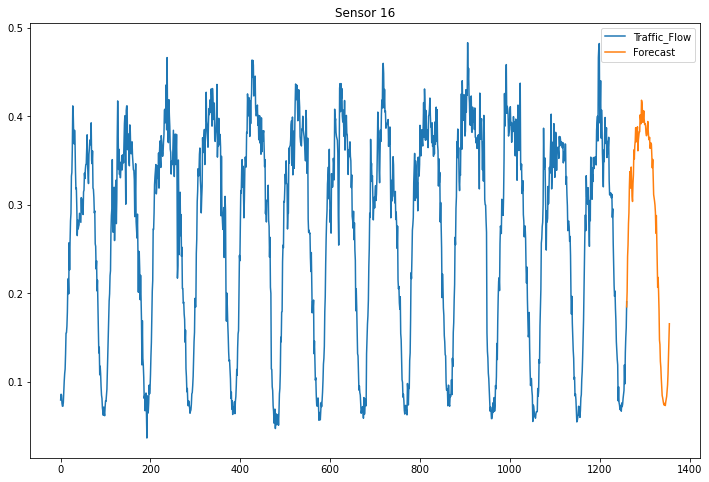

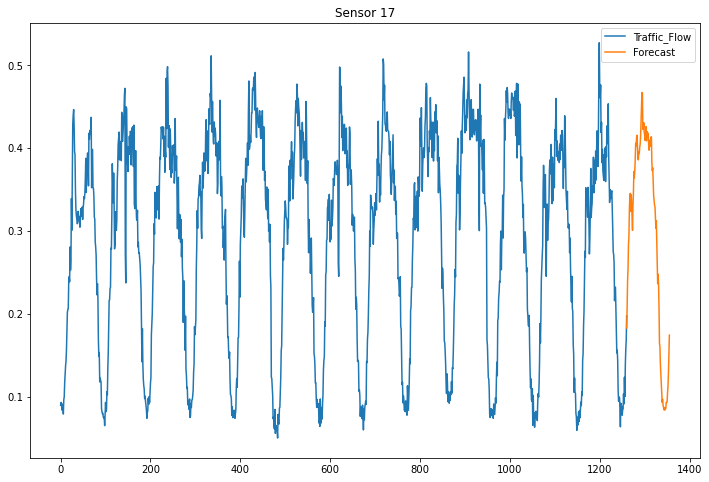

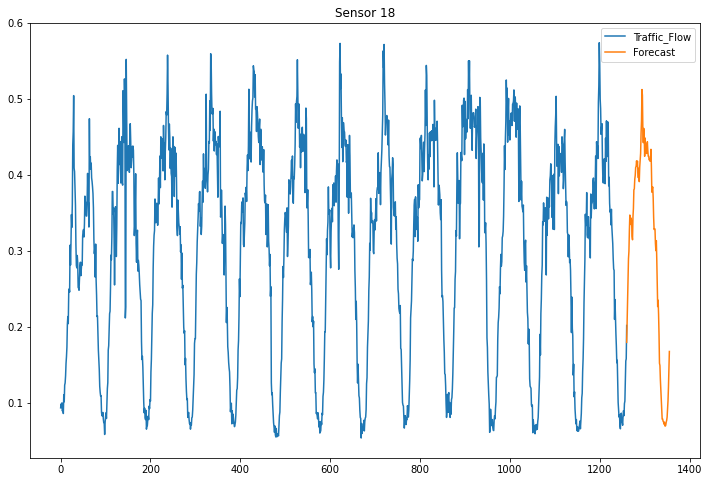

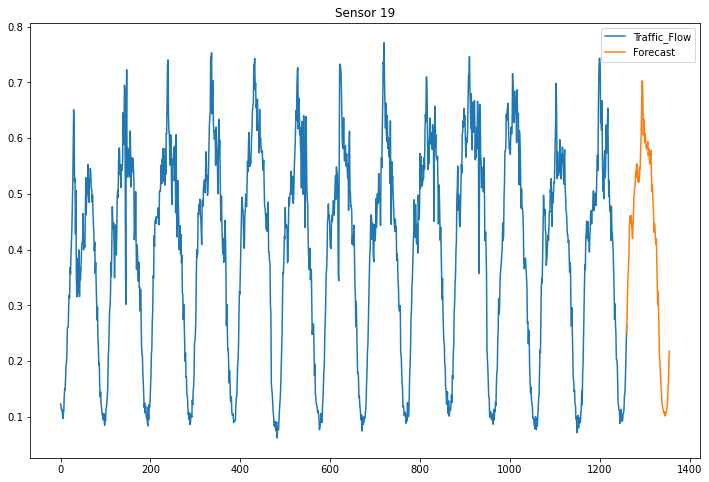

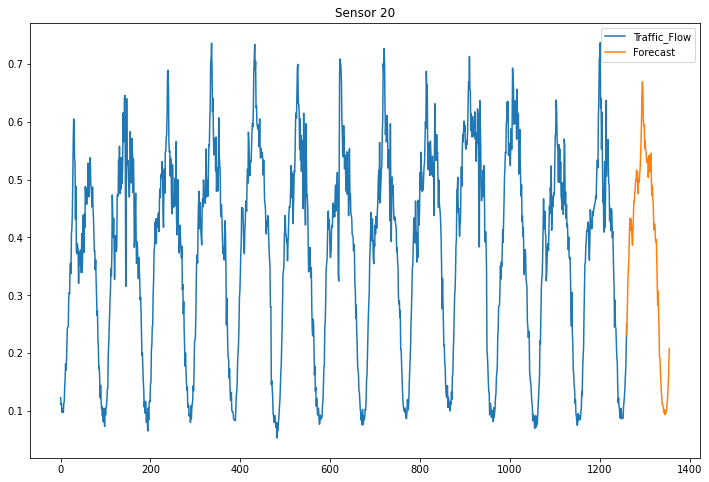

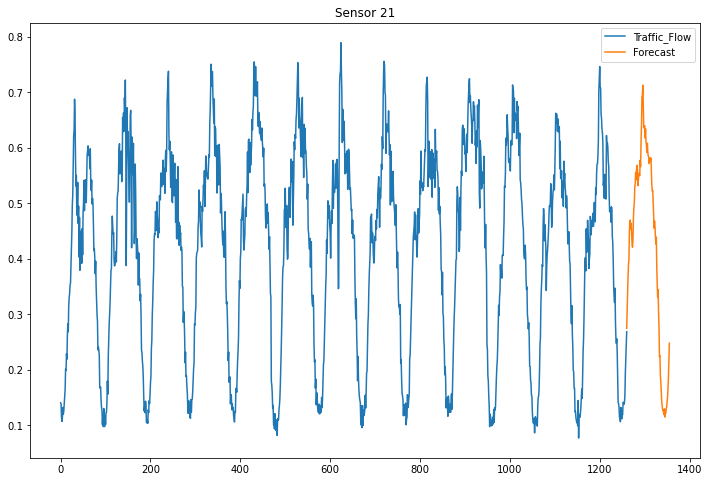

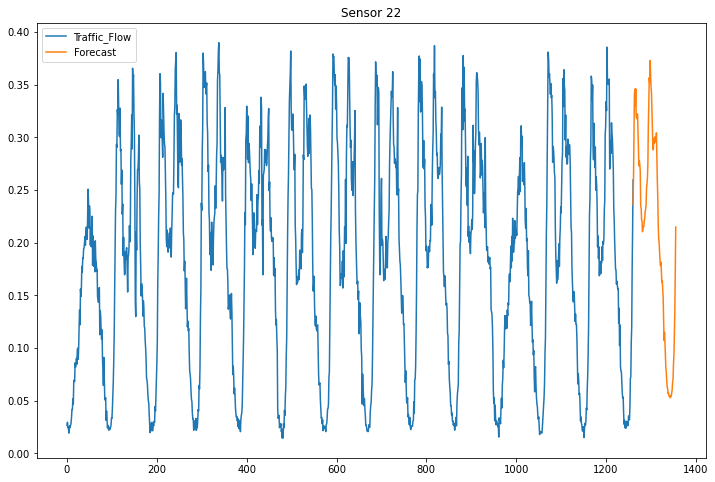

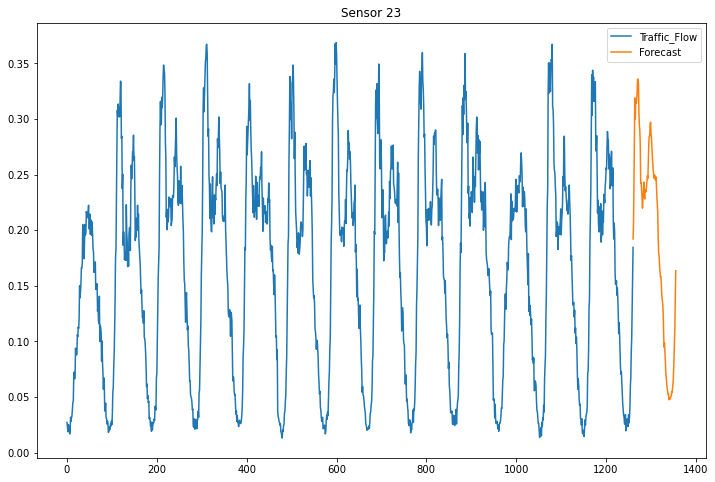

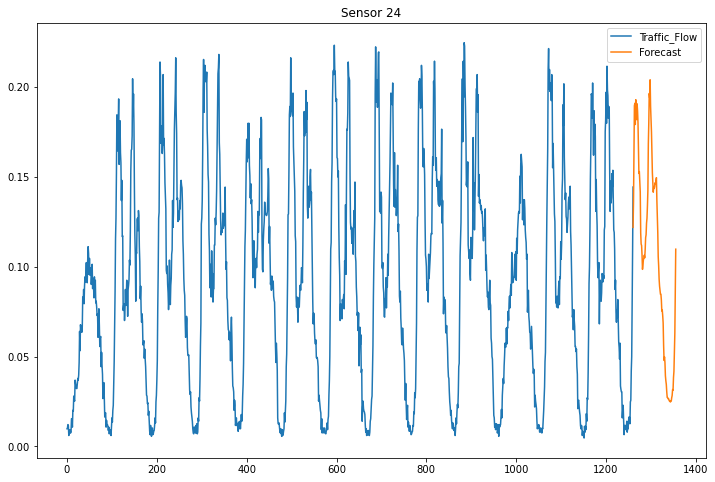

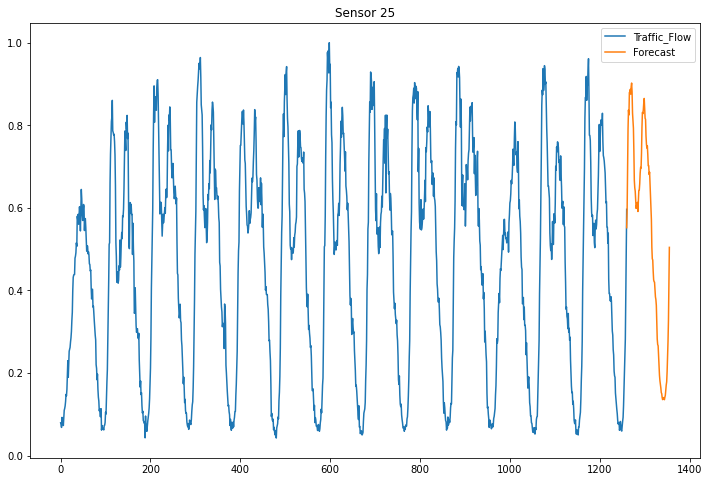

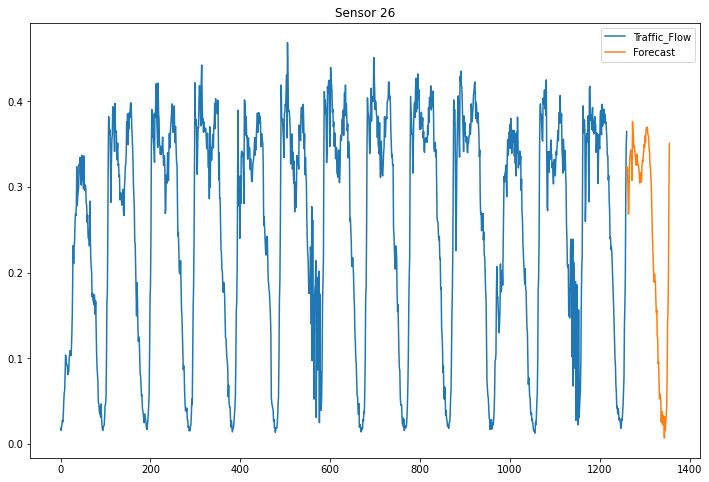

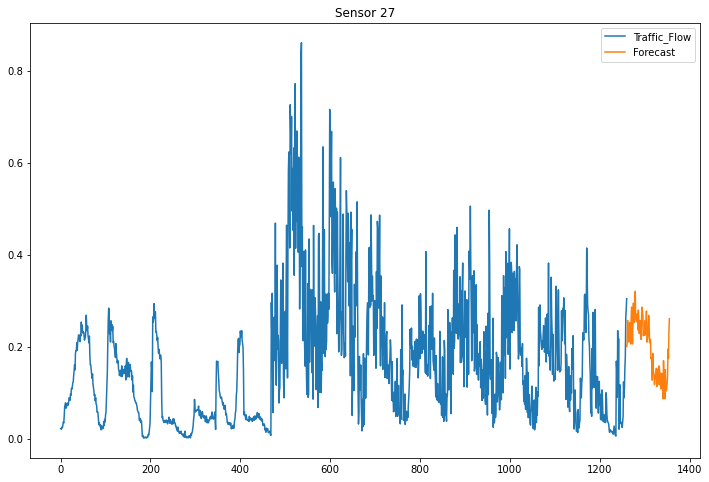

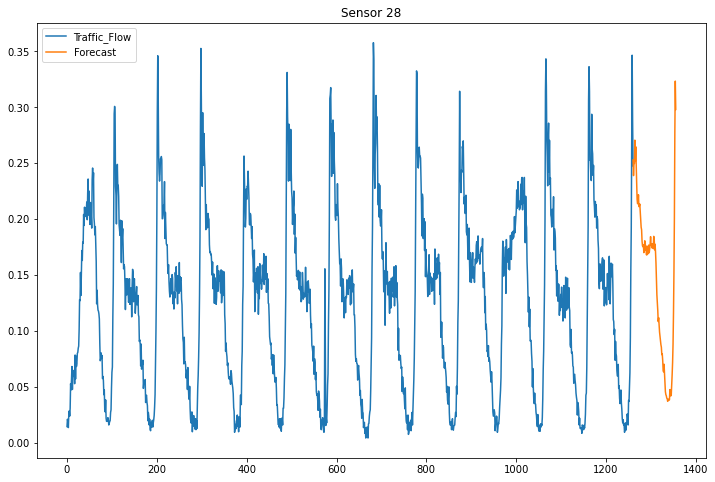

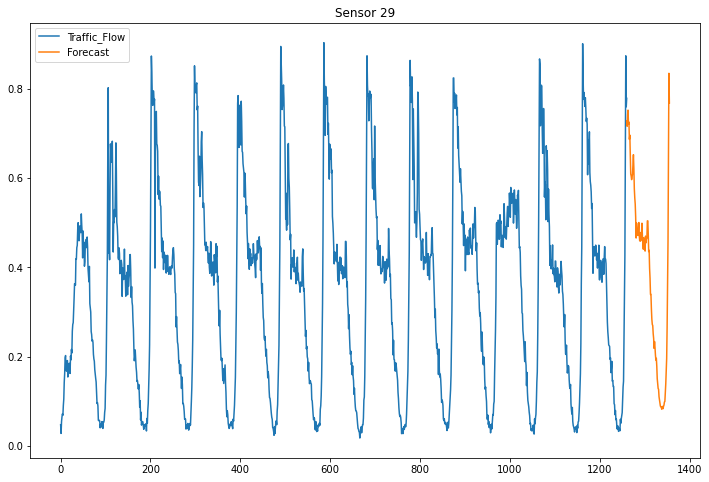

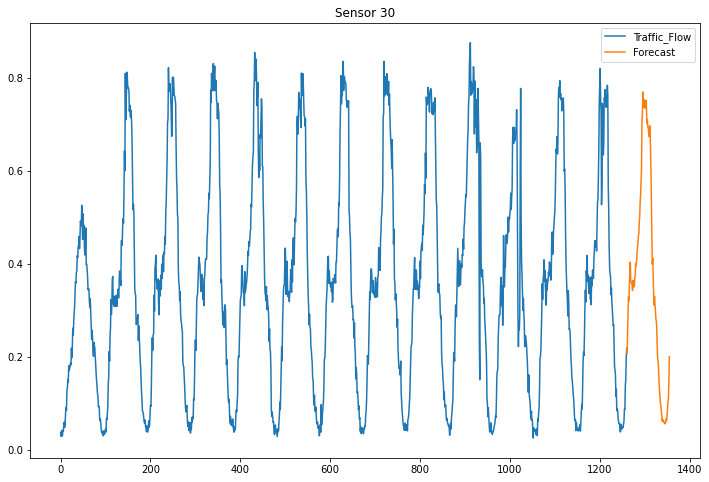

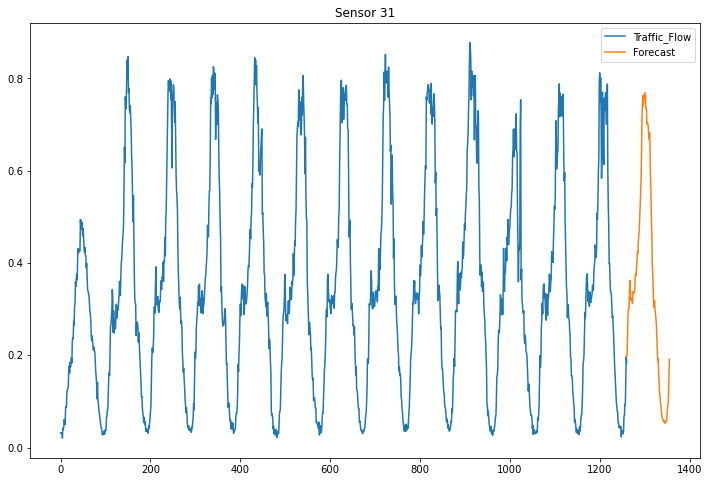

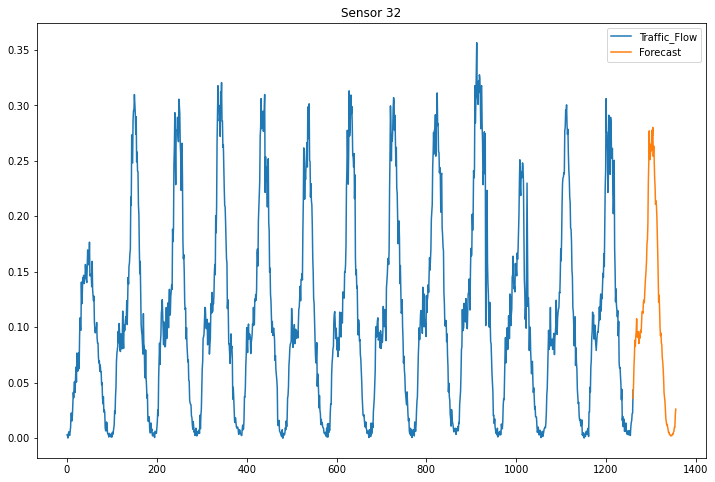

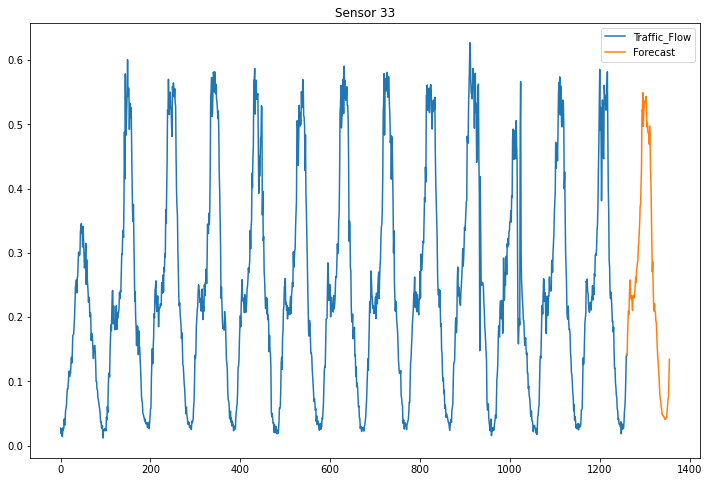

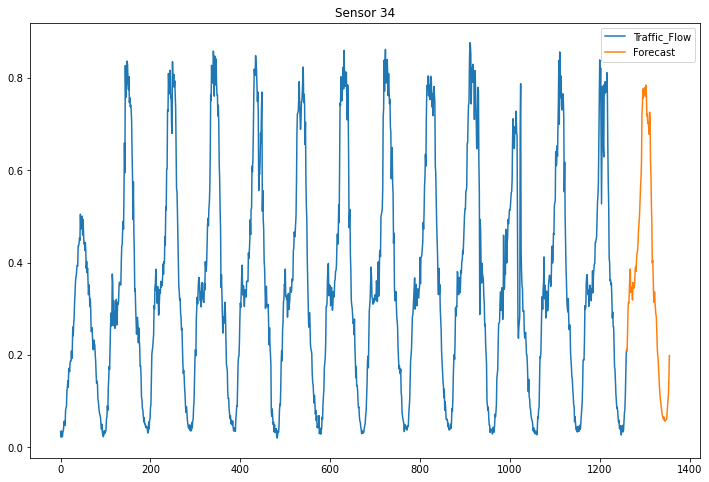

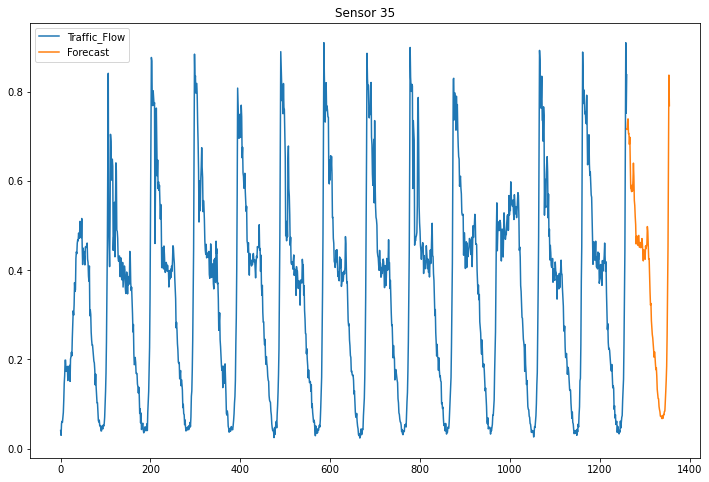

In [5]:

##Function

def adfuller_test(Traffic_Flow):
    result = adfuller(Traffic_Flow)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")


## Function of SARIMAX

def SARIMAX(data_df_00_t,sensornumber):

    import statsmodels.api as sm
    model=sm.tsa.statespace.SARIMAX(data_df_00_t['Traffic_Flow'],order=(1, 1, 1),seasonal_order=(1,1,1,96))
    results=model.fit(maxiter=200)
    results.summary()
    
    # createing future data set and merging it

    future_dates = pd.DataFrame(columns=data_df_00_t.columns).astype(data_df_00_t.dtypes)
    for i in range(96):                                  # Append rows within for loop
        future_dates.loc[i + data_df_00_t.index[-1]] = None

    future_data_df_00_t=pd.concat([data_df_00_t,future_dates])

    future_data_df_00_t['Forecast'] = results.predict(start = 1260, end = 1355, dynamic= True)
    graph = future_data_df_00_t[['Traffic_Flow', 'Forecast']].plot(figsize=(12, 8) ,title = sensornumber)
    #print(graph)
    fig = graph.get_figure()
    fig.savefig(sensornumber+".jpeg")
    


## code for Trafiic predection using SARIMAX model

import scipy.io 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

import time

data_set = scipy.io.loadmat('traffic_dataset.mat')


## Data frame assignment
df_tra_X_tr = pd.DataFrame(data_set.get('tra_X_tr'))
df_tra_X_te = pd.DataFrame(data_set.get('tra_X_te'))
df_tra_Y_tr = pd.DataFrame(data_set.get('tra_Y_tr'))
df_tra_Y_te = pd.DataFrame(data_set.get('tra_Y_te'))
df_tra_adj_mat = pd.DataFrame(data_set.get('tra_adj_mat'))



##Varial assignment
# i = 0, j = 1 for first sensor 
i = 0
j = 1
sensor_number = 0

for x in range(36):
    

    data_df_00 = df_tra_Y_tr.iloc[i:j]
    data_df_00_t = data_df_00.transpose()

    ##### get row number of the dataframe and insert it as first column

    data_df_00_t.insert(loc=0, column='row_num', value=np.arange(len(data_df_00_t)))
    # adding column name to the respective columns
    data_df_00_t.columns =['Time_Indx', 'Traffic_Flow']


    data_df_00_t.set_index('Time_Indx',inplace=True)


    from pylab import rcParams
    rcParams['figure.figsize'] = 15, 7
    sensornumber = ("Sensor "+ str(i))

    
    # check for dicky fuller enable if needed
    #print("\nDicky fuller test for ",sensornumber)
    #adfuller_test(data_df_00_t['Traffic_Flow'])
    
    # Running SARIMAX Model
    print("Starting SARIMAX Model for" ,sensornumber )
    SARIMAX(data_df_00_t,sensornumber)
    
    i = i+1
    j = j+1
    time.sleep(90)
